In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

names1880=pd.read_csv("data/babynames/yob1880.txt", 
                     names=['name', 'sex', 'births'])
names1880
names1880.shape
names1880.info()


SyntaxError: invalid syntax (<ipython-input-3-149cd1d489b1>, line 10)

In [4]:
years=range(1880, 2011)
pieces=[]
for year in years:
    path="data/babynames/yob%d.txt" % year
    frame=pd.read_csv(path, names=['name', 'sex', 'births'])
    frame['year']=year
    pieces.append(frame)
names=pd.concat(pieces, ignore_index=True)
names.shape
#len(pieces) #[frame,   ,   , ]

(1690784, 4)

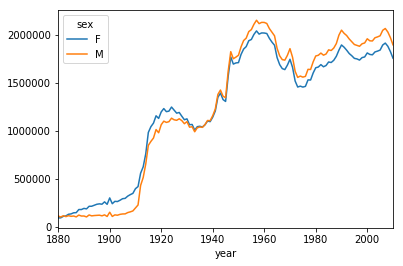

In [7]:
total_births=names.pivot_table('births', index='year', 
                  columns='sex', aggfunc=sum)
total_births.plot()

In [8]:
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


In [9]:
names
#169만의 의미?
#각 년도별/성별 이름에 대한 종류의 합

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [18]:
#names.groupby(['year', 'sex']).births.sum()
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group
    #group.info()
    #print(group)
    #retrun group
names=names.groupby(['year', 'sex']).apply(add_prop)
print(names)


              name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
5         Margaret   F    1578  1880  0.017342
6              Ida   F    1472  1880  0.016177
7            Alice   F    1414  1880  0.015540
8           Bertha   F    1320  1880  0.014507
9            Sarah   F    1288  1880  0.014155
10           Annie   F    1258  1880  0.013825
11           Clara   F    1226  1880  0.013474
12            Ella   F    1156  1880  0.012704
13        Florence   F    1063  1880  0.011682
14            Cora   F    1045  1880  0.011484
15          Martha   F    1040  1880  0.011429
16           Laura   F    1012  1880  0.011122
17          Nellie   F     995  1880  0.010935
18           Grace   F     982  1880  0.010792
19          Carrie   F     949  1880  0.010429
20           

In [27]:
#연도별, 성별에 따른 빈도수가 가장 높은 이름 1000개 추출
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
    #print(group)

grouped=names.groupby(['year', 'sex'])
top1000=grouped.apply(get_top1000)
top1000.index=np.arange(len(top1000))
top1000.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            261867, 261868, 261869, 261870, 261871, 261872, 261873, 261874,
            261875, 261876],
           dtype='int64', length=261877)

In [33]:
#이름 유행 분석
boys=top1000[top1000.sex=="M"]
girls=top1000[top1000.sex=="F"]

In [36]:
total_births=top1000.pivot_table('births', index='year',\
                                 columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B739E97940>,
      dtype=object)

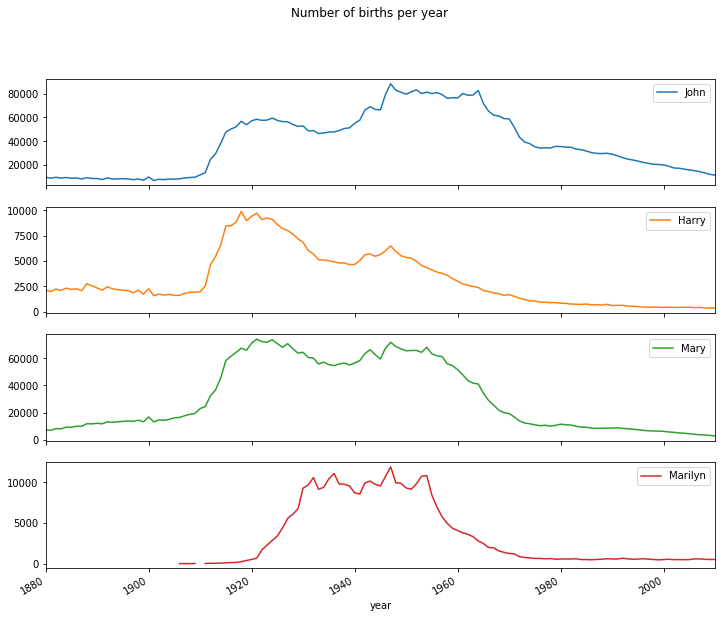

In [45]:
sub_set=total_births[['John','Harry','Mary', 'Marilyn']]
sub_set.plot(subplots=True, figsize=(12,10),title="Number of births per year")